In [51]:
import pandas as pd

In [52]:
!ls ../data/ireland-historical-news/

irishtimes-date-text.csv  w3-latnigrin-text.csv


In [68]:
data_size = 1000

In [69]:
datatext_df = pandas.read_csv('../data/ireland-historical-news/irishtimes-date-text.csv', nrows=data_size)
datatext_df.dataframeName = 'irishtimes-date-text.csv'

# latnigrintext_df = pandas.read_csv('../data/ireland-historical-news/w3-latnigrin-text.csv')

In [70]:
datatext_df.head(5)

,publish_date,headline_category,headline_text
0,19960102,news,UUP sees possibility of voting Major out
1,19960102,news,Pubs targeted as curbs on smoking are extended
2,19960102,news,Papers reveal secret links with O'Neill cabinet
3,19960102,news,Domestic chaos as Italy takes EU presidency
4,19960102,news,Learning about the star to which we owe life


# dataset 기본

### size and index

In [71]:
datatext_df.index

RangeIndex(start=0, stop=1000, step=1)

In [72]:
datatext_df.index.size

1000

In [73]:
nRow, nCol = datatext_df.shape
nRow, nCol

(1000, 3)

In [74]:
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 3 columns


### columns

In [75]:
datatext_df.columns

Index(['publish_date', 'headline_category', 'headline_text'], dtype='object')

In [76]:
type(datatext_df.columns)

pandas.core.indexes.base.Index

In [77]:
datatext_df.columns.values

array(['publish_date', 'headline_category', 'headline_text'], dtype=object)

In [78]:
# columns 별 unique 한 values 의 갯수
datatext_df.nunique()

publish_date           7
headline_category      7
headline_text        991
dtype: int64

### plotting

In [79]:
from matplotlib import pyplot as plt
import numpy as np

In [80]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

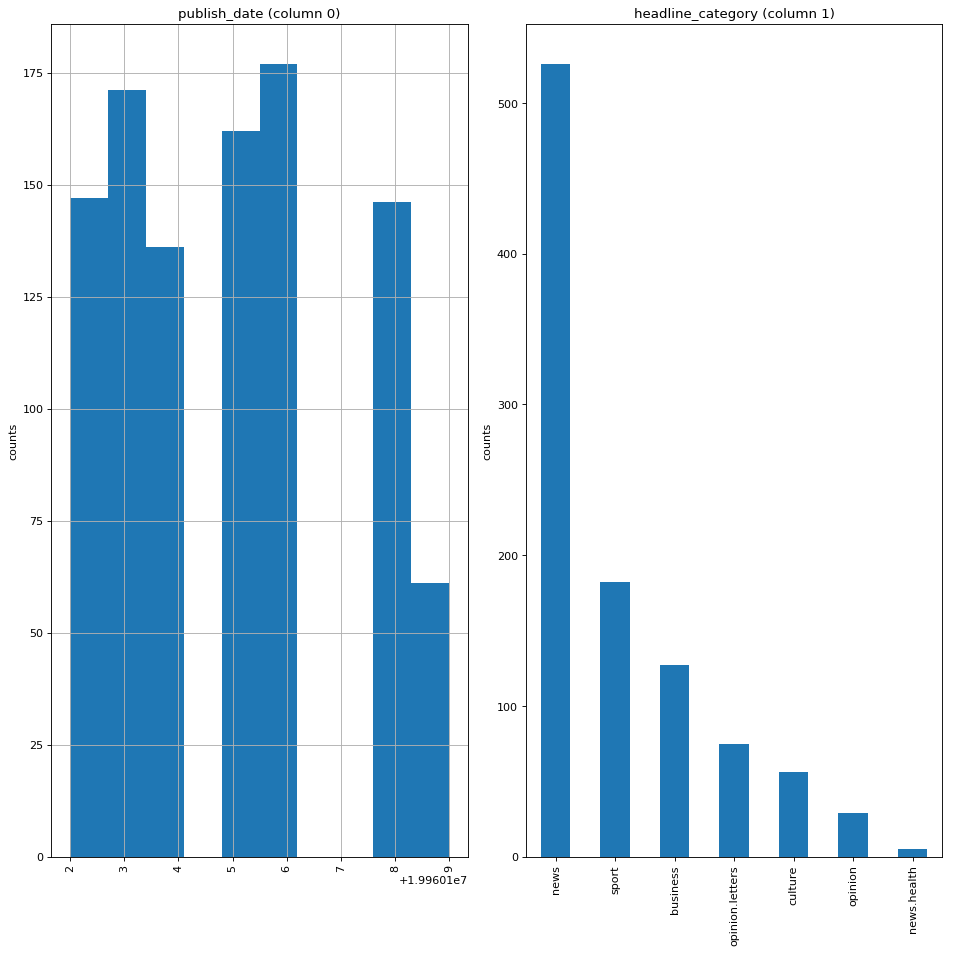

In [81]:
plotPerColumnDistribution(datatext_df, 2, 2)

### column modification

In [45]:
df = datatext_df

In [46]:
df.columns

Index(['publish_date', 'headline_category', 'headline_text'], dtype='object')

In [50]:
df['publish_date']

0          19960102
1          19960102
2          19960102
3          19960102
4          19960102
5          19960102
6          19960102
7          19960102
8          19960102
9          19960102
10         19960102
11         19960102
12         19960102
13         19960102
14         19960102
15         19960102
16         19960102
17         19960102
18         19960102
19         19960102
20         19960102
21         19960102
22         19960102
23         19960102
24         19960102
25         19960102
26         19960102
27         19960102
28         19960102
29         19960102
             ...   
1425430    20181231
1425431    20181231
1425432    20181231
1425433    20181231
1425434    20181231
1425435    20181231
1425436    20181231
1425437    20181231
1425438    20181231
1425439    20181231
1425440    20181231
1425441    20181231
1425442    20181231
1425443    20181231
1425444    20181231
1425445    20181231
1425446    20181231
1425447    20181231
1425448    20181231


In [49]:
df['publish_month']

0          0     
1          0     
2          0     
3          0     
4          0     
5          0     
6          0     
7          0     
8          0     
9          0     
10         0     
11         0     
12         0     
13         0     
14         0     
15         0     
16         0     
17         0     
18         0     
19         0     
20         0     
21         0     
22         0     
23         0     
24         0     
25         0     
26         0     
27         0     
28         0     
29         0     
            ...  
1425430    0     
1425431    0     
1425432    0     
1425433    0     
1425434    0     
1425435    0     
1425436    0     
1425437    0     
1425438    0     
1425439    0     
1425440    0     
1425441    0     
1425442    0     
1425443    0     
1425444    0     
1425445    0     
1425446    0     
1425447    0     
1425448    0     
1425449    0     
1425450    0     
1425451    0     
1425452    0     
1425453    0     
1425454   

In [48]:
df['publish_month'] = str(df.publish_date)[:6]
df['publish_year'] = str(df.publish_date)[:4]
df['publish_month_only'] = str(df.publish_date)[4:6]
df['publish_day_only'] = str(df.publish_date)[6:8]

df['dt_date'] = pd.to_datetime(df['publish_date'], format='%Y%m%d')
df['dt_month'] = pd.to_datetime(df['publish_month'], format='%Y%m')



ValueError: time data '0     ' does not match format '%Y%m' (match)